# Flights On Time
## by Vincent Khor

## Investigation Overview

The goal of this investigation is to examine flight performance data to see whether certain variables are present that could affect whether a flight is more likely to be cancelled or delayed.

## Dataset Overview

This dataset comes from the Bureau of Transportation Statistics. It contains data about flights from USA between January - April 2008. On-time performance of domestic flights by large carriers are included. Information includes the number of on-time, delayed, cancelled and diverted flights.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import math
%matplotlib inline
def darkgrid():
    sns.set_style('darkgrid')
    
def dark():
    sns.set_style('dark')

# set theme
darkgrid()

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df_flights = pd.read_csv('flights_2008.csv')
df_airports = pd.read_csv('airports.csv')

# Make copy of dataframes before cleaning
flights = df_flights.copy()
airports = df_airports.copy()

In [9]:
# Converting column names to be more descriptive
col_name = {'Year':'year', 'Month':'month', 'DayofMonth':'day_of_month','DayOfWeek':'day_of_week',
            'DepTime':'actual_dep_time','CRSDepTime':'scheduled_dep_time','ArrTime':'actual_arr_time',
            'CRSArrTime':'scheduled_arr_time','UniqueCarrier':'carrier_code','FlightNum':'flight_number',
            'TailNum':'tail_number','ActualElapsedTime':'actual_elapsed_time','CRSElapsedTime':'scheduled_elapsed_time',
            'AirTime':'air_time','ArrDelay':'arr_delay','DepDelay':'dep_delay','Origin':'origin','Dest':'destination',
            'Distance':'distance','TaxiIn':'taxi_in_time','TaxiOut':'taxi_out_time','Cancelled':'cancelled',
            'CancellationCode':'cancellation_code','Diverted':'diverted','CarrierDelay':'carrier_delay',
            'WeatherDelay':'weather_delay','NASDelay':'nas_delay', 'SecurityDelay':'security_delay',
            'LateAircraftDelay':'late_aircraft_delay'}
flights=flights.rename(columns=col_name)

In [10]:
# replace 'day of week' values
day = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
flights['day_of_week'].replace(day, inplace=True)
# Set day order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
day_order = pd.api.types.CategoricalDtype(ordered=True, categories=days)
flights['day_of_week'] = flights['day_of_week'].astype(day_order);

In [11]:
# convert NaN values to 0
delay_columns = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

for column in delay_columns:
    print('Start: There are '+str(flights[column].isnull().sum()) +' NaN values in the '+str(column)+' column.')
    flights[column].fillna(0,inplace=True)
    print('End: There are '+str(flights[column].isnull().sum()) +' NaN values in the '+str(column)+' column. \n')

Start: There are 1804634 NaN values in the carrier_delay column.
End: There are 0 NaN values in the carrier_delay column. 

Start: There are 1804634 NaN values in the weather_delay column.
End: There are 0 NaN values in the weather_delay column. 

Start: There are 1804634 NaN values in the nas_delay column.
End: There are 0 NaN values in the nas_delay column. 

Start: There are 1804634 NaN values in the security_delay column.
End: There are 0 NaN values in the security_delay column. 

Start: There are 1804634 NaN values in the late_aircraft_delay column.
End: There are 0 NaN values in the late_aircraft_delay column. 



In [12]:
# Create column for whether a flight is delayed

# convert delays to 1 and on time to 0
flights['delayed'] = flights['dep_delay'].apply(lambda x: 1 if x>0 else 0)

## What are the reasons for flight cancellations?
There are four categories for flight cancellations: carrier, weather, NAS and security. The two most common reasons for flight cancellations are carrier and weather. NAS has approximately half the frequency and security is the rarest reason as only 6 flights were cancelled for this reason.

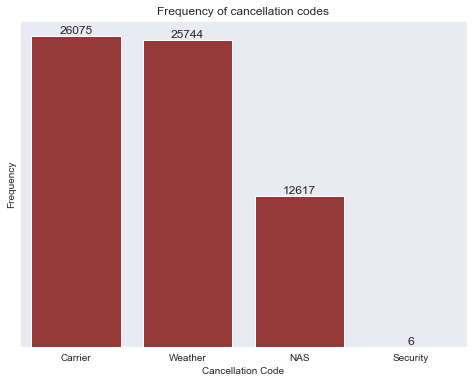

In [13]:
# Cancellation code count

# Plot graph
plt.figure(figsize=(8,6))
code_order = ['A','B','C','D']
x = sns.countplot(data=flights,x='cancellation_code',order=code_order,color='brown')

# Labels
plt.xlabel('Cancellation Code')
plt.ylabel('Frequency')
plt.yticks([])
plt.title('Frequency of cancellation codes')
x.set_xticklabels(['Carrier','Weather','NAS','Security'])

# value counts on bars
cancellation_count = flights.cancellation_code.value_counts()
for i in range (cancellation_count.shape[0]):
    count = cancellation_count[i]
    plt.text(i,count+900,count,ha='center',va='top',size=12);

## What proportion of flights are delayed?

A large proportion of flights do not depart on time, 58.4% do depart on time but 41.6% are delayed.

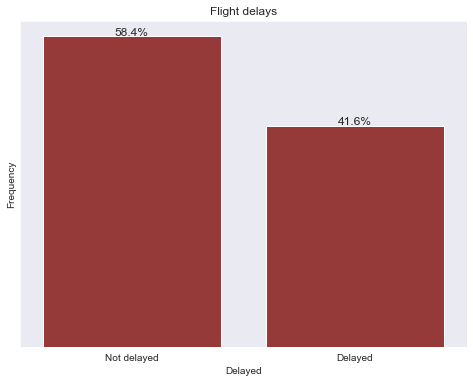

In [14]:
# flights delayed count

# Plot graph
plt.figure(figsize=(8,6))

x = sns.countplot(data=flights,x='delayed',color='brown')

# Labels
plt.xlabel('Delayed')
plt.ylabel('Frequency')
plt.yticks([])
plt.title('Flight delays')
x.set_xticklabels(['Not delayed','Delayed'])

# percentage counts on bars
delay_count = flights.delayed.value_counts()
for i in range (delay_count.shape[0]):
    count = delay_count[i]
    pc_count= str(round(delay_count[i]/delay_count.sum()*100,1))+('%')
    plt.text(i,count+40000,pc_count,ha='center',va='top',size=12);

## What is the proportion of delays by carrier?

The proportion of delays by carrier varies greatly. Two of the carriers, WN and CO have over 50% of flights delayed whilst the two best carriers are AQ and HA who both have less than 20% of flights delayed.

In [17]:
# function for proportions by carrier
def cancel_by_carrier(var,title):
    plt.figure(figsize=(20,7))
    base_colour = sns.color_palette()[0]
    # Calculate mean values by carrier
    cancel = flights.groupby('carrier_code').mean()
    
    # Set order
    order = cancel[var].sort_values(ascending=False).index

    # plot graph
    sns.barplot(data=cancel,x=cancel.index,y=var,order=order,color=base_colour);
    
    # labels
    plt.xlabel('Carrier code')
    plt.ylabel('Proportion of '+title)
    plt.title('Proportion of '+title+' by carrier');

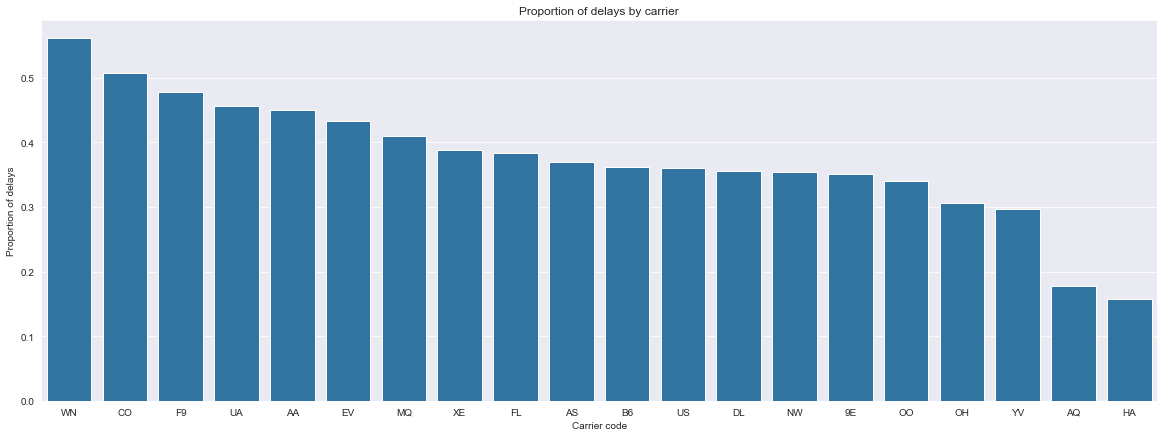

In [18]:
cancel_by_carrier('delayed','delays')

## What is the distribution of flight delays?
The majority of flights depart and arrive on time, in fact, most flights actually arrive early. This suggests that a lot of flights are able to makeup time during the flight to reduce the delay or even arrive early. 

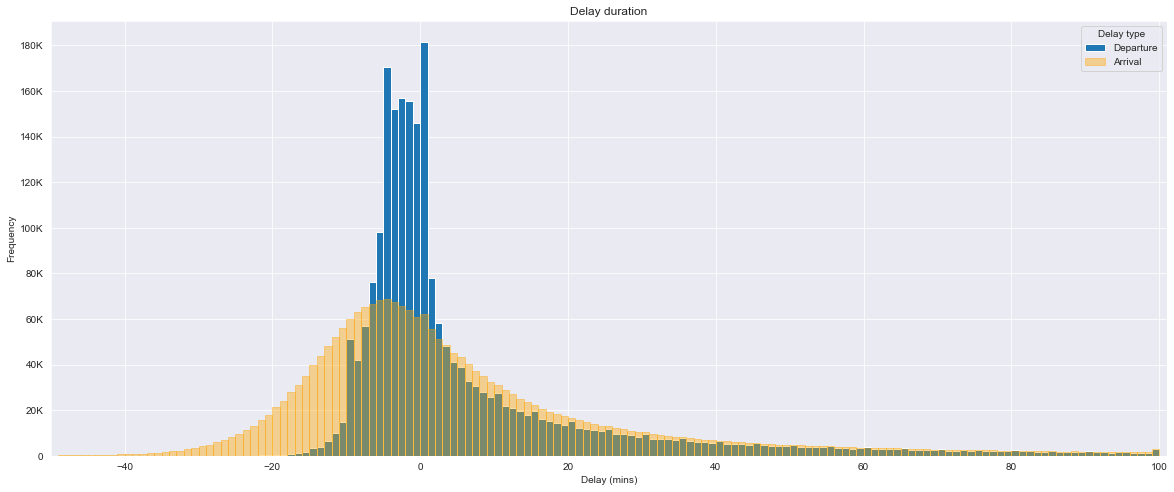

In [19]:
plt.figure(figsize = (20, 8))
base_colour = sns.color_palette()[0]

bins = np.arange(-50,100+1,1) # Select bin size
tick_locs = np.arange(0,18e4+2e4,2e4) # set tick locations
tick_labels = [0,'20K','40K','60K','80K','100K','120K','140K','160K','180K']

# plot delay times
plt.hist(data=flights,x='dep_delay',bins=bins,ec='white',color=base_colour,)
plt.hist(data=flights,x='arr_delay',bins=bins,ec='orange',color='orange',alpha=0.4)

# set labels and axes
plt.xlim(-50,100+1)
plt.yticks(tick_locs,tick_labels)
plt.ylabel('Frequency')
plt.xlabel('Delay (mins)')
plt.title('Delay duration')
plt.legend(['Departure','Arrival'],title='Delay type');

## What was the major cause of delay and does this trend differ depending on the day of the week?

When examining the major causes of delay, it is clear that weather causes the greatest average increase in delay time, weather delays increase delays by on average 70mins. Late aircraft was next closely followed by carrier delays, both of these had average delays of 50-60mins. The two least impactful delays were NAS followed by security, these only had delays of 30-40mins on average. The trend for all of these remains consistent when categorised by day of the week.

In [20]:
carrier_delay = flights[flights['carrier_delay']>0].groupby('day_of_week').mean()
weather_delay = flights[flights['weather_delay']>0].groupby('day_of_week').mean()
nas_delay = flights[flights['nas_delay']>0].groupby('day_of_week').mean()
security_delay = flights[flights['security_delay']>0].groupby('day_of_week').mean()
late_aircraft_delay = flights[flights['late_aircraft_delay']>0].groupby('day_of_week').mean()

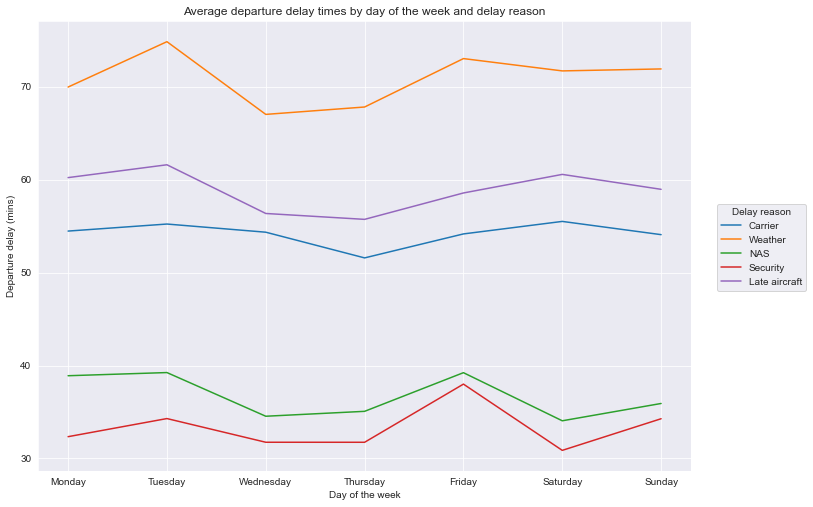

In [49]:
#plt.figure(figsize=(20,10))
plt.figure(figsize=[ 11.69, 8.27])
#plots
plt.plot(carrier_delay.dep_delay)
plt.plot(weather_delay.dep_delay)
plt.plot(nas_delay.dep_delay)
plt.plot(security_delay.dep_delay)
plt.plot(late_aircraft_delay.dep_delay)
#labels
plt.ylabel('Departure delay (mins)')
plt.xlabel('Day of the week')
plt.title('Average departure delay times by day of the week and delay reason')
plt.legend(['Carrier','Weather','NAS','Security','Late aircraft'],title = 'Delay reason',loc=(1.04,0.4));

## Summary

- The main reason for cancellations are carrier and weather.
- 58.4% do depart on time but 41.6% are delayed.
- Carriers WN and CO have the highest proportion of delays whilst AQ and HA have the lowest.
- Most flights depart on time but most flights arrive early, this suggests that flights can makeup time during the flight. 
- Weather delays create the longest delays followed by late aircraft and carrier. The least impactful delays are NAS and security.

In [54]:
!jupyter nbconvert 2008_Flight_Delays_Slide_Deck.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook 2008_Flight_Delays_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 715253 bytes to 2008_Flight_Delays_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/2008_Flight_Delays_Slide_Deck.slides.html
Use Control-C to stop this server
^C

Interrupted
